In [50]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [51]:
graduation_data = Path("resources/graduation_data.csv")
state_data = Path("resources/state_data.csv")


In [52]:
graduation_data_df = pd.read_csv(graduation_data)
state_data_df = pd.read_csv(state_data)
graduation_data_df.head()


,State,2012-13
0,Alabama ..................,44233.0
1,Alaska ...................,7860.0
2,Arizona ..................,62208.0
3,Arkansas .................,28928.0
4,California ...............,422125.0


In [53]:
graduation_data_copy = graduation_data_df.copy()

In [54]:
graduation_data_copy["State"] = graduation_data_copy['State'].str.replace(r'\.+$', '', regex=True)
graduation_data_copy.head()


,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [55]:
graduation_data_copy["State"]=graduation_data_copy["State"].apply(lambda x: x.strip())
graduation_data_copy.head()

,State,2012-13
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [56]:
graduation_data_copy = graduation_data_copy.rename(columns = {"State":"State", "2012-13":"Graduates"})
graduation_data_copy.head()

,State,Graduates
0,Alabama,44233.0
1,Alaska,7860.0
2,Arizona,62208.0
3,Arkansas,28928.0
4,California,422125.0


In [57]:
state_data_copy=state_data_df.copy()
state_data_copy=state_data_copy.rename(columns={"State Name [State] 2012-13":"State"})
state_data_copy.head()

,State Name,State,Instruction Expenditures (STE1) [State Finance] 2012-13,State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13,Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13,Pupil/Teacher Ratio [State] 2012-13,Local Rev. - Property Tax (R1A) [State Finance] 2012-13,Grade 12 Students [Public School] 2012-13
0,CALIFORNIA,California,3.481554e+10,5696.00,1173.0,23.66,18324047150.00,494197.00
1,UTAH,Utah,2.494567e+09,4122.00,733.0,23.05,1466486401.00,40773.00
2,ARIZONA,Arizona,4.445724e+09,3640.00,1174.0,22.29,3013963966.00,81540.00
3,OREGON,Oregon,3.126634e+09,5177.00,970.0,22.25,2052018055.00,43637.00
4,NEVADA,Nevada,2.056074e+09,3135.00,902.0,21.54,1080252772.00,31939.00


In [58]:
merged=pd.merge(graduation_data_copy,state_data_copy,how="inner",on="State")
merged=merged.rename(columns={
    "State Revenues (R3) per Pupil (MEMBR) [State Finance] 2012-13":"State Revenue Per Pupil",
    "Federal Revenues (STR4) per Pupil (MEMBR) [State Finance] 2012-13":"Federal Revenue Per Pupil",
    "Pupil/Teacher Ratio [State] 2012-13":"Pupil to Teacher Ratio",
    "Grade 12 Students [Public School] 2012-13":"Grade 12 Students"
})
merged=merged.drop(["Instruction Expenditures (STE1) [State Finance] 2012-13","Local Rev. - Property Tax (R1A) [State Finance] 2012-13","State Name"],axis="columns")
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.00,1142.0,14.35,‡
1,Alaska,7860.0,13918.00,2464.0,17.12,9681.00
2,Arizona,62208.0,3640.00,1174.0,22.29,81540.00
3,Arkansas,28928.0,5398.00,1259.0,14.24,30734.00
4,California,422125.0,5696.00,1173.0,23.66,494197.00
5,Colorado,50968.0,4360.00,814.0,17.65,62491.00
6,Connecticut,38722.0,7558.00,838.0,12.54,40743.00
7,Delaware,8070.0,8708.00,1491.0,13.94,8330.00
8,Florida,158029.0,3512.00,1147.0,15.25,183193.00
9,Georgia,92416.0,4474.00,1094.0,15.57,101078.00


In [59]:

merged["Grade 12 Students"]=merged["Grade 12 Students"].str.replace(r'[^0-9.]', '', regex=True).str.strip()
merged["Grade 12 Students"]=pd.to_numeric(merged["Grade 12 Students"],errors="coerce")

In [60]:
merged["State Revenue Per Pupil"]=pd.to_numeric(merged["State Revenue Per Pupil"],errors="coerce")

In [61]:
print(merged.dtypes)

merged.head()


State                         object
Graduates                    float64
State Revenue Per Pupil      float64
Federal Revenue Per Pupil    float64
Pupil to Teacher Ratio       float64
Grade 12 Students            float64
dtype: object


,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0


In [62]:
merged["Graduation Rates"]=merged["Graduates"]/merged["Grade 12 Students"]
merged["Combined Federal and State Revenue Per Pupil"]=merged["State Revenue Per Pupil"]+merged["Federal Revenue Per Pupil"]
merged.head()

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0


In [63]:
state_to_region = {
    "Hawaii":"West",
    "Washington":"West",
    "Oregon":"West",
    "California":"West",
    "Alaska":"West",
    "Nevada":"West",
    "Idaho":"West",
    "Montana":"West",
    "Wyoming":"West",
    "Colorado":"West",
    "Utah":"West",
    "New Mexico":"West",
    "Arizona":"West",
    "North Dakota":"Midwest",
    "South Dakota":"Midwest",
    "Nebraska":"Midwest",
    "Kansas":"Midwest",
    "Minnesota":"Midwest",
    "Iowa":"Midwest",
    "Missouri":"Midwest",
    "Wisconsin":"Midwest",
    "Illinois":"Midwest",
    "Michigan":"Midwest",
    "Indiana":"Midwest",
    "Ohio":"Midwest",
    "Texas":"South",
    "Oklahoma":"South",
    "Arkansas":"South",
    "Louisiana":"South",
    "Mississippi":"South",
    "Kentucky":"South",
    "Tennessee":"South",
    "Alabama":"South",
    "Georgia":"South",
    "Florida":"South",
    "South Carolina":"South",
    "North Carolina":"South",
    "Virginia":"South",
    "West Virginia":"South",
    "Delaware":"South",
    "Maryland": 'South',
    "Pennsylvania": 'Northeast',
    "New York": 'Northeast',
    "New Jersey": 'Northeast',
    "Connecticut": 'Northeast',
    "Vermont": 'Northeast',
    "Rhode Island": 'Northeast',
    "Maine": 'Northeast',
    "Massachusetts": 'Northeast',
    "New Hampshire" : 'Northeast'
}
merged['Region'] = merged['State'].map(state_to_region)
merged

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
0,Alabama,44233.0,5286.0,1142.0,14.35,NaN,NaN,6428.0,South
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West
6,Connecticut,38722.0,7558.0,838.0,12.54,40743.0,0.950396,8396.0,Northeast
7,Delaware,8070.0,8708.0,1491.0,13.94,8330.0,0.968788,10199.0,South
8,Florida,158029.0,3512.0,1147.0,15.25,183193.0,0.862637,4659.0,South
9,Georgia,92416.0,4474.0,1094.0,15.57,101078.0,0.914304,5568.0,South


In [73]:
merged_clean=merged.copy().dropna()
merged_clean.head()

,State,Graduates,State Revenue Per Pupil,Federal Revenue Per Pupil,Pupil to Teacher Ratio,Grade 12 Students,Graduation Rates,Combined Federal and State Revenue Per Pupil,Region
1,Alaska,7860.0,13918.0,2464.0,17.12,9681.0,0.811900,16382.0,West
2,Arizona,62208.0,3640.0,1174.0,22.29,81540.0,0.762914,4814.0,West
3,Arkansas,28928.0,5398.0,1259.0,14.24,30734.0,0.941238,6657.0,South
4,California,422125.0,5696.0,1173.0,23.66,494197.0,0.854163,6869.0,West
5,Colorado,50968.0,4360.0,814.0,17.65,62491.0,0.815605,5174.0,West


In [64]:
by_region_statefunding=merged.groupby("Region")["State Revenue Per Pupil"].mean()
by_region_statefunding=pd.DataFrame(by_region_statefunding)
by_region_statefunding

,State Revenue Per Pupil
Region,
Midwest,5595.500000
Northeast,7815.111111
South,5306.812500
West,6536.230769


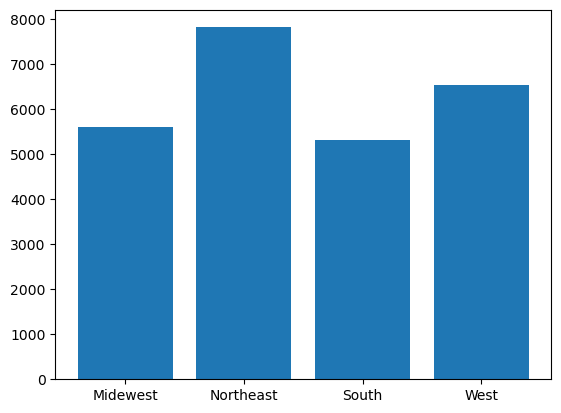

In [65]:
y_axis=by_region_statefunding["State Revenue Per Pupil"]
x_axis=["Midewest","Northeast","South","West"]
plt.bar(x_axis,y_axis)
plt.show()

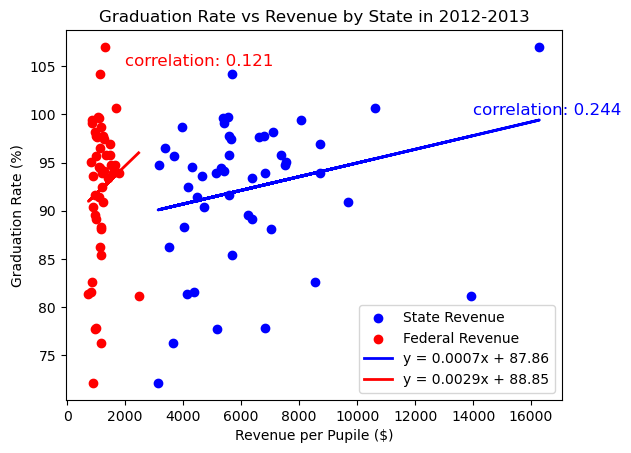

In [ ]:
import numpy as np
x_1=merged_clean["State Revenue Per Pupil"]
x_2=merged_clean["Federal Revenue Per Pupil"]
y=merged_clean["Graduation Rates"]*100

slope1, intercept1, rvalue1, pvalue1, stderr1 = linregress(x_1, y)
line_eq1 = f"y = {slope1:.4f}x + {intercept1:.2f}"
slope2, intercept2, rvalue2, pvalue2, stderr2 = linregress(x_2, y)
line_eq2 = f"y = {slope2:.4f}x + {intercept2:.2f}"

fig,ax=plt.subplots()
ax.scatter(x_1,y,color="blue",label="State Revenue")
ax.scatter(x_2,y,color="red",label="Federal Revenue")

regress_values1 = slope1 * x_1 + intercept1
ax.plot(x_1, regress_values1, color="blue", linewidth=2, label=line_eq1)
regress_values2 = slope2 * x_2 + intercept2
ax.plot(x_2, regress_values2, color="red", linewidth=2, label=line_eq2)

correlation1 = round(st.pearsonr(x_1, y)[0],3)
correlation2 = round(st.pearsonr(x_2, y)[0],3)

ax.annotate(f"correlation: {correlation1}", (14000,100), fontsize=12, color="blue") 
ax.annotate(f"correlation: {correlation2}",(2000,105), fontsize=12, color="red")

plt.xlabel("Revenue per Pupile ($)")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate vs Revenue by State in 2012-2013")
ax.legend()
#plt.savefig("output_data/Fig#.png")
plt.show()

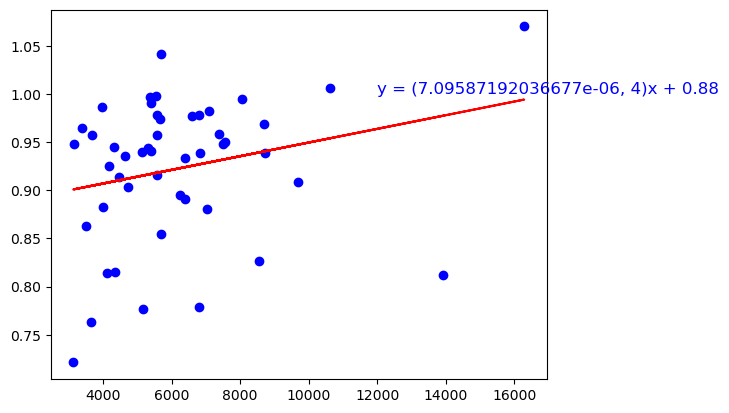

PearsonRResult(statistic=0.24367991794786314, pvalue=0.09511211822578797)


In [ ]:

x_values=merged_clean["State Revenue Per Pupil"]
y_values=merged_clean["Graduation Rates"]
plt.scatter(x_values,y_values,color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str((slope,4)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(12000,1),fontsize=12,color="blue")
correlation = st.pearsonr(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()
print(correlation)

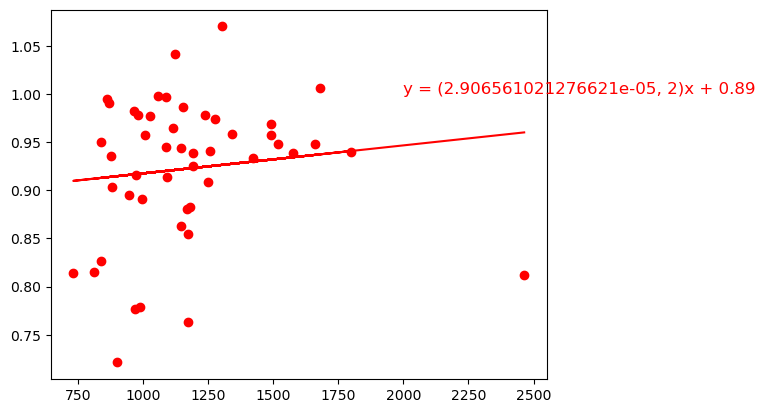

PearsonRResult(statistic=0.12082023782029888, pvalue=0.41335423689470535)


In [87]:
x_values=merged_clean["Federal Revenue Per Pupil"]
y_values=merged_clean["Graduation Rates"]
plt.scatter(x_values,y_values,color="red")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str((slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(2000,1),fontsize=12,color="red")
correlation = st.pearsonr(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.show()
print(correlation)

/var/folders/zb/rdps0xt88v5d04008k8cd30r0000gn/T/ipykernel_5525/1892432424.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-",color="purple")


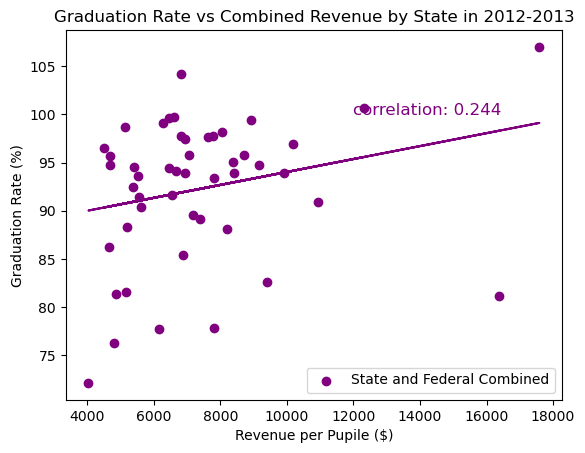

0.244


In [ ]:
x_values=merged_clean["Combined Federal and State Revenue Per Pupil"]
y_values=merged_clean["Graduation Rates"]*100
plt.scatter(x_values,y_values,color="purple",label="State and Federal Combined")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str((slope,2)) + "x + " + str(round(intercept,2))
correlation = round(st.pearsonr(x_values,y_values)[0],3)
plt.annotate(f"correlation: {correlation}",(12000,100),fontsize=12,color="purple")
plt.plot(x_values,regress_values,"r-",color="purple")
plt.legend(loc="lower right")
plt.xlabel("Revenue per Pupile ($)")
plt.ylabel("Graduation Rate (%)")
plt.title("Graduation Rate vs Combined Revenue by State in 2012-2013")
plt.show()
#plt.savefig("output_data/Fig#.png")

print(correlation)